Imports

In [1]:
import cv2
import numpy as np

Use matplotlib instead of cv2.imshow

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [25, 15]

cv2.imshow = lambda _, im: plt.imshow(im, 'binary')
cv2.waitKey = lambda _: None

Load image

In [3]:
def load_image(show = False):
    test_file_name = 'test_binarized.jpg'
    test_image = cv2.imread(test_file_name)
    if show:
        image_resized = cv2.resize(test_image, (960, 540))
        cv2.imshow('test_image', image_resized)
        cv2.waitKey(0)
    return test_image

test_image = load_image()

Convert to grayscale

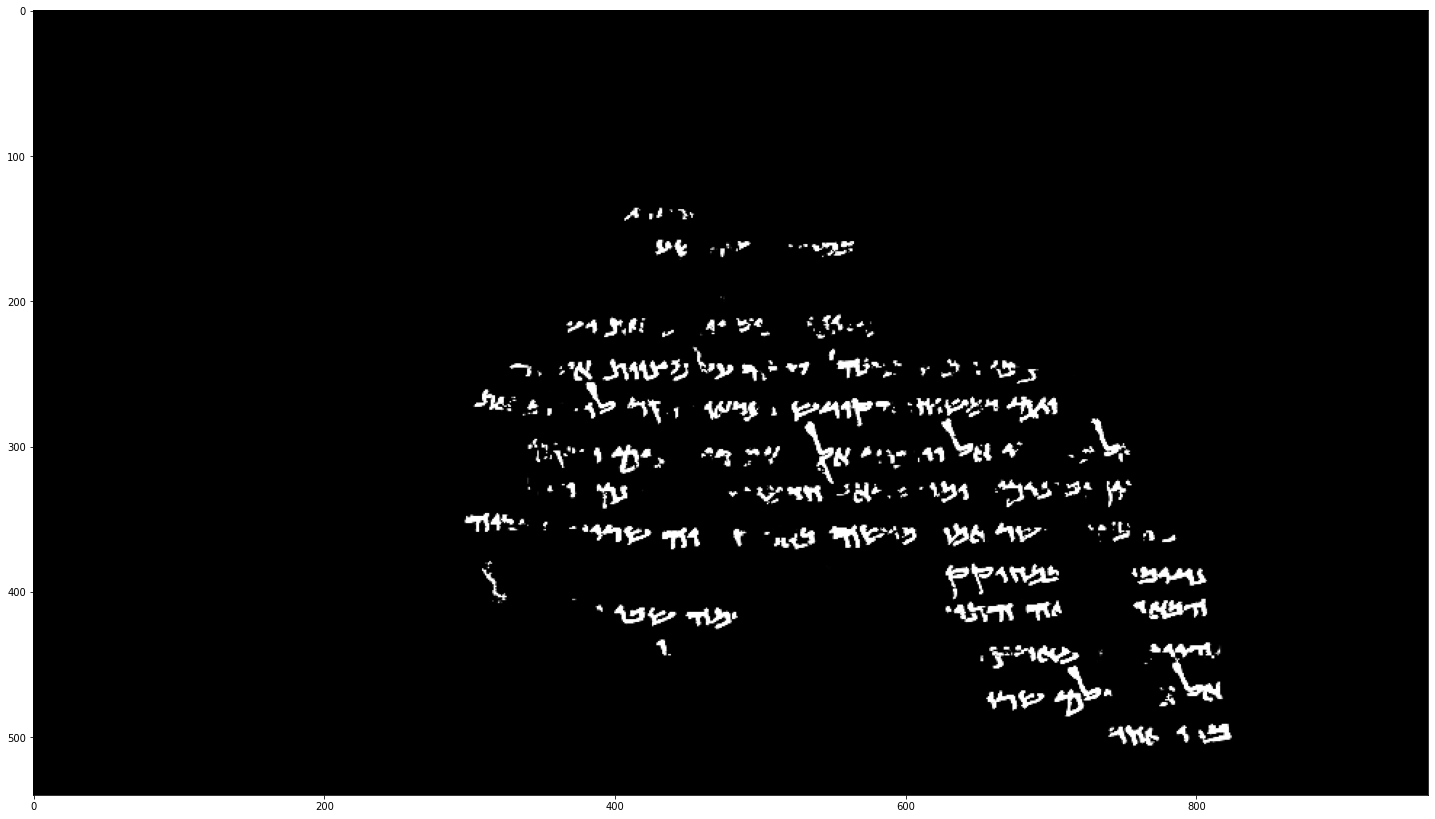

In [9]:
def convert_to_grayscale(image, show=False):
    image_grayscale = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    if show:
        grayscale_resized = cv2.resize(image_grayscale, (960, 540))
        cv2.imshow('test_image_grayscale', grayscale_resized)
        cv2.waitKey(0)
    return image_grayscale

image_grayscale = convert_to_grayscale(test_image, True)

In [20]:
def threshold_image(image, show=False):
    ret, image_threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    if show:
        threshold_resized = cv2.resize(image_threshold, (1520, 960))
        cv2.imshow('test_image_threshold', threshold_resized)
        cv2.waitKey(0)
    return image_threshold

image_threshold = threshold_image(image_grayscale)

In [7]:
def assert_image_thresholded(image):
    unique = np.unique(image)
    assert 0 in unique
    assert 255 in unique
    return True

assert_image_thresholded(image_threshold)

True

Erode image


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

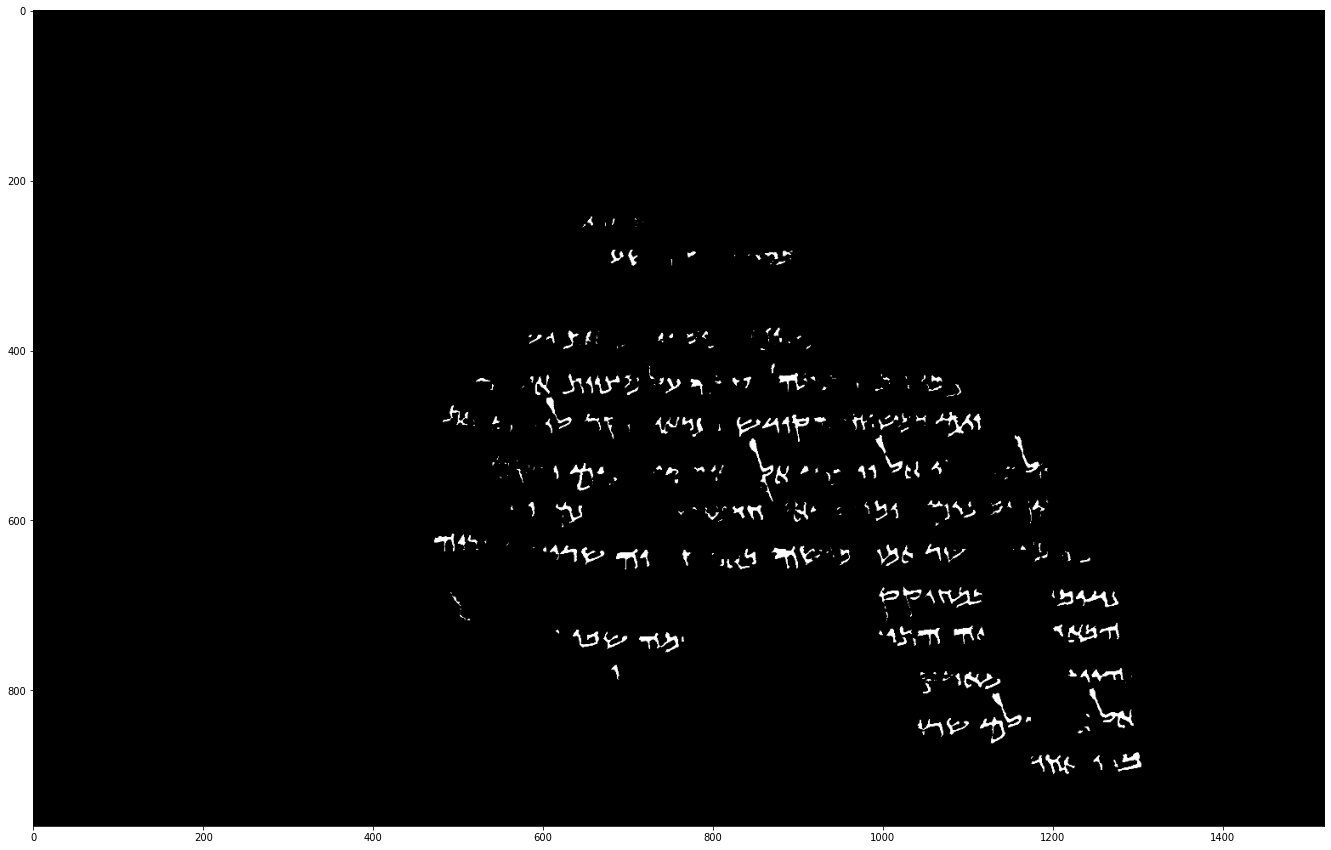

In [30]:
def erode_image(image, erosion_size, show=False):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * erosion_size + 1, 2 * erosion_size + 1),
                                       (erosion_size, erosion_size))
    eroded = cv2.dilate(image, se)
    if show:
        eroded_resized = cv2.resize(eroded, (1520, 960))
        cv2.imshow('eroded', eroded_resized)
        cv2.waitKey(0)
    return eroded

erode_image(image_threshold, 3, True)


Invert image, since opencv uses black background

In [14]:
def invert_image(image, show = False):
    image_inverted = cv2.bitwise_not(image)
    if show:
        inverted_resized = cv2.resize(image_inverted, (960, 540))
        cv2.imshow('test_image_invert', inverted_resized)
        cv2.waitKey(0)
    return image_inverted

image_inverted = invert_image(image_threshold)

Find contours

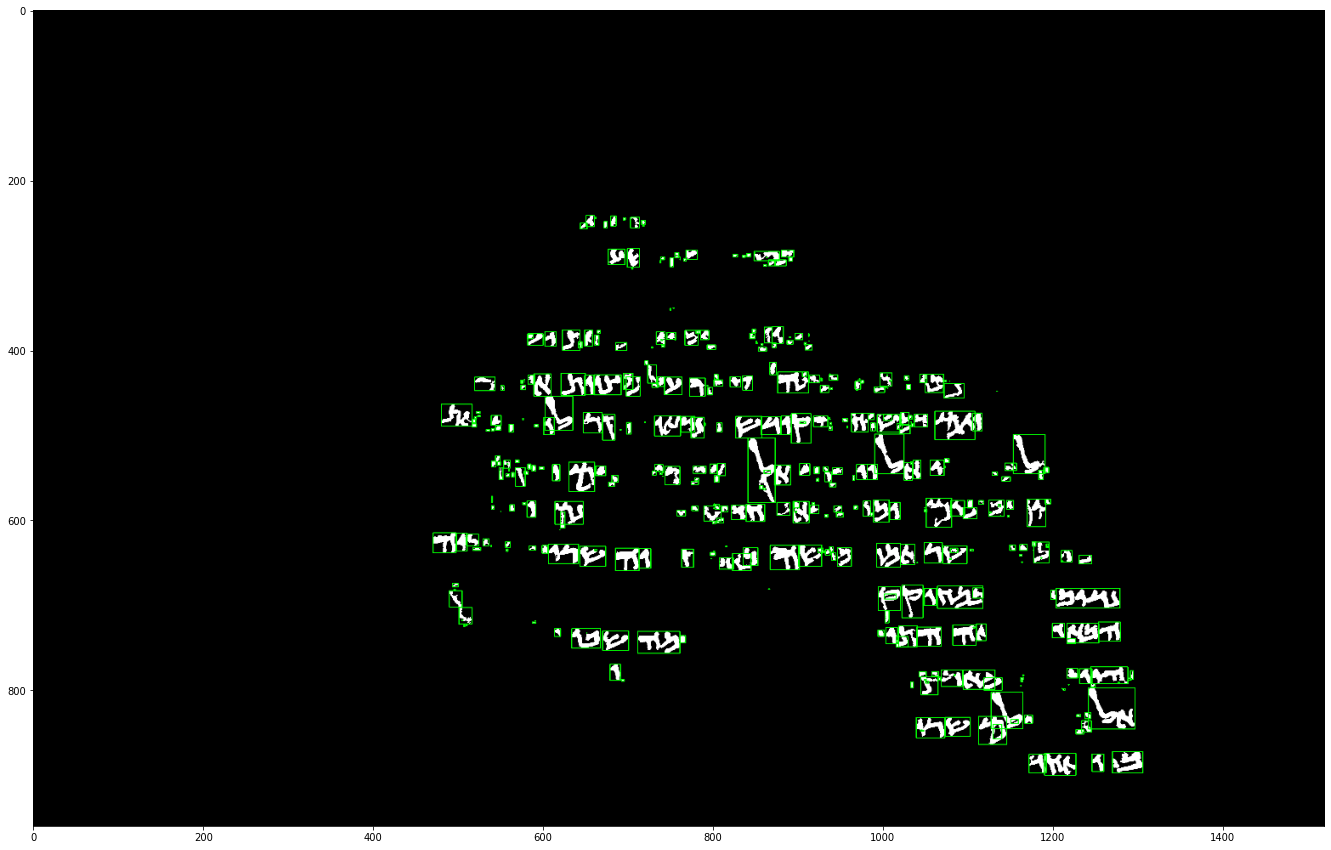

In [15]:
def find_contours(original_image):
    image = original_image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    image_clr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    show_individual = False
    for i, ctr in enumerate(sorted_contours):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)

        # Getting ROI
        roi = image_clr[y:y+h, x:x+w]

        cv2.rectangle(image_clr,(x,y),( x + w, y + h ),(0,255,0),2)
        # show ROI
        if show_individual:
            cv2.imshow('segment no:'+str(i),roi)
            cv2.waitKey(0)

    image_resized = cv2.resize(image_clr, (1520, 960))
    cv2.imshow('image resized', image_resized)
    cv2.waitKey(0)
    return sorted_contours

contours = find_contours(image_inverted)

Draw contours

In [10]:
print('Number of contours: %d'%len(contours))

Number of contours: 442


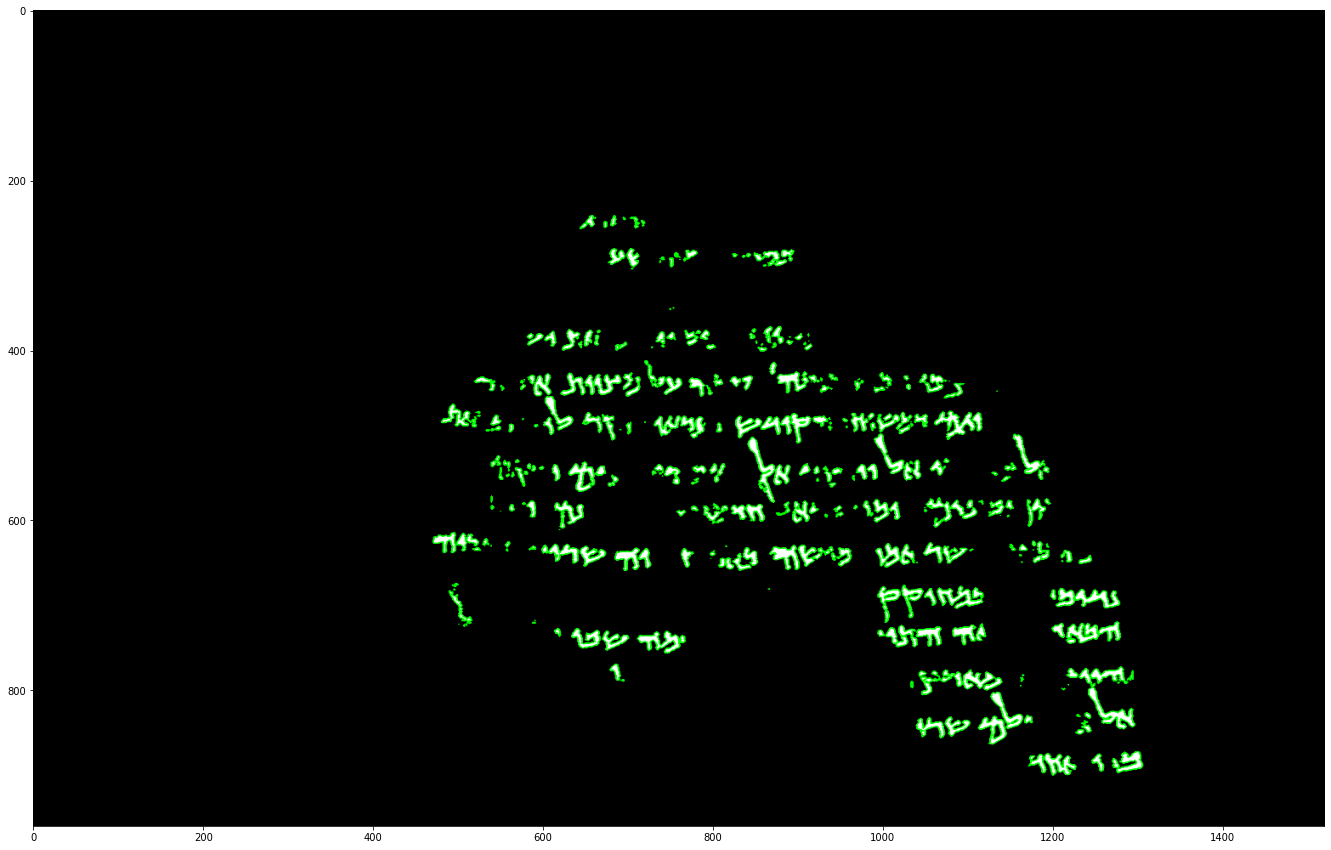

In [17]:
def draw_contours(image, contours, show=True):
    contoured_image = image.copy()
    contoured_image_clr = cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB)
    if show:
        contoured_resized = cv2.resize(image_inverted, (1520, 960))
        cv2.imshow('contoured prior', contoured_resized)
        cv2.waitKey(0)
    cv2.drawContours(contoured_image_clr, contours, -1, (0, 255, 0), 3)
    if show:
        contoured_resized_clr = cv2.resize(contoured_image_clr, (1520, 960))
        cv2.imshow('Contour', contoured_resized_clr)
        cv2.waitKey(0)
    return contoured_image

image_contoured = draw_contours(image_inverted, contours)

In [12]:
print(np.unique(image_contoured))

[  0 255]


-1

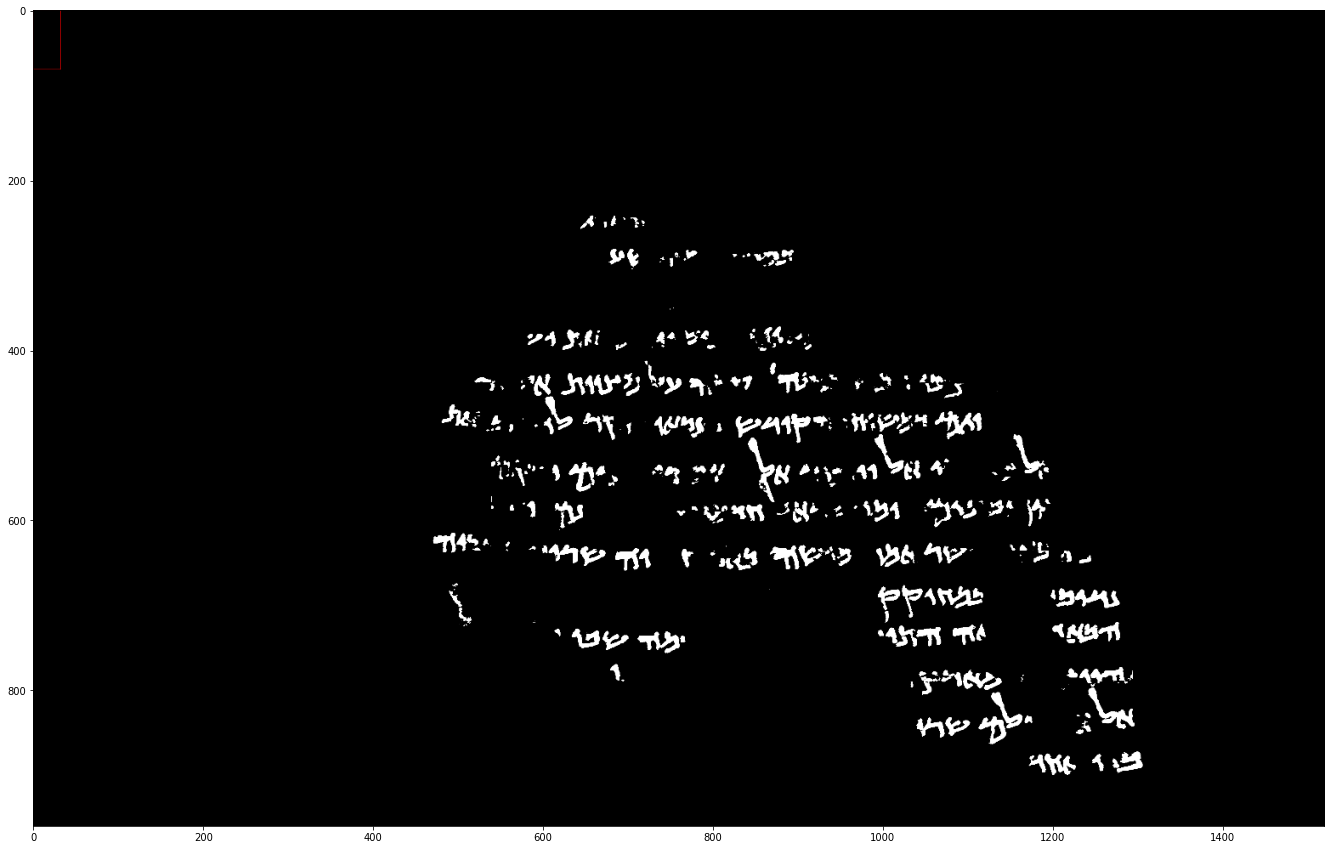

In [18]:
img = image_contoured.copy()
img_coloured = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.rectangle(img_coloured, (0,0), (77,196), (255,0,0), 1)
inverted_scaled = cv2.resize(img_coloured, (1520, 960))
cv2.imshow('test', inverted_scaled)
cv2.waitKey(0)

In [14]:
print(img.shape)

(2706, 3608)


In [15]:
character_size = (196,77)
cv2.imshow('test', img)
cv2.waitKey(0)

27